In [29]:
# Manipulate date
import pandas as pd 
import numpy as np
# Visualize data 
import matplotlib.pyplot as plt
import seaborn as sns
# Load Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Performance metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image

In [30]:
model = load_model("my_model")

In [31]:
data = ImageDataGenerator(rescale = 1./255)
val_generator = data.flow_from_directory('/Users/pabloalonsomedrano/Desktop/Eurosat/2750', 
target_size=(64,64), batch_size=200, class_mode='sparse')

Found 27000 images belonging to 10 classes.


/var/folders/6s/wv7gl9zx4blgt0hj5k5cj_nr0000gn/T/ipykernel_4758/2771859051.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicted_labels = model.predict_generator(val_generator)


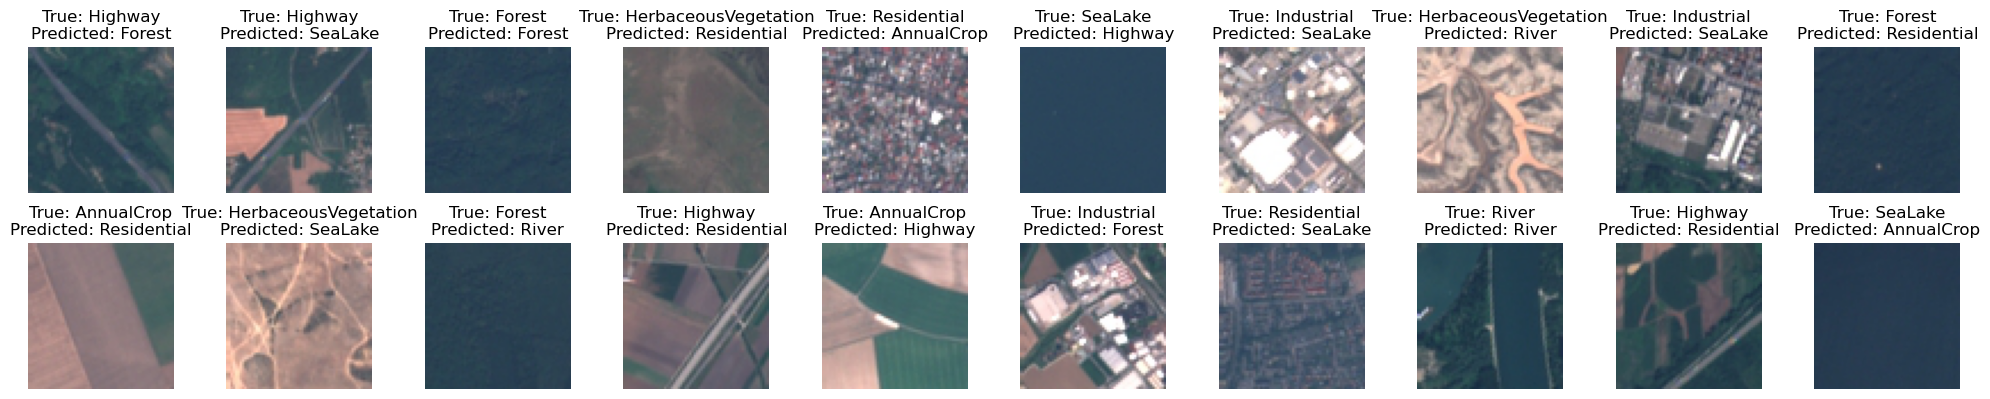

In [32]:
# Generate predictions on the validation data
predicted_labels = model.predict_generator(val_generator)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predicted_labels, axis=1)

# Get the true labels for the validation data
true_labels = val_generator.classes

# Get the class names for the Eurosat dataset
class_names = list(val_generator.class_indices.keys())

# Choose 20 random images from the validation set
random_indices = np.random.choice(range(len(true_labels)), size=20, replace=False)

# Plot the random images and their predicted vs true labels
from PIL import Image

plt.figure(figsize=(20, 8))
for i, idx in enumerate(random_indices):
    # Load the image
    img = Image.open(val_generator.filepaths[idx])
    # Plot the image
    plt.subplot(4, 10, i+1)
    plt.imshow(img)
    plt.axis('off')
    # Add the predicted and true labels as title
    plt.title('True: {}\nPredicted: {}'.format(class_names[true_labels[idx]], class_names[predicted_labels[idx]]))
plt.tight_layout()
plt.show()